## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido : Fabián Catuogno

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [14]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

#Config Tamaño de Plots
plt.rcParams['figure.figsize'] = [16, 8]

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################

import scipy.signal as signal

<ipython-input-6-0a8fa53384f9>:48: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(frec, 20*np.log10(espectro[0:,index]), label=Ventanas[index])


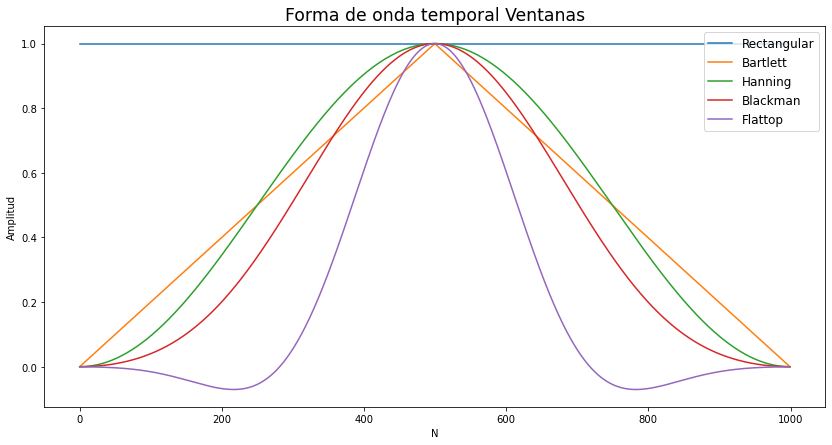

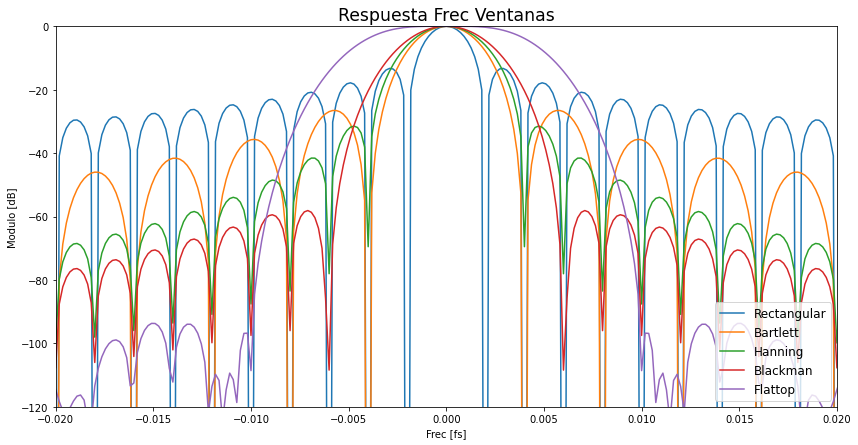

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Cantidad de Zero Padding
nn = 10*N

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N)
VentBarlett = signal.windows.bartlett(N)
VentHann = signal.windows.hann(N)
VentBlack = signal.windows.blackman(N)
VentFlat = signal.windows.flattop(N)

matriz = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))


#Graficas Temporales de Ventanas
plt.close('all')
fig, ax1 = plt.subplots()

for index in Ventanas:
    
    ax1.plot(matriz[0:,index], label=Ventanas[index])
  

ax1.set_title('Forma de onda temporal Ventanas', fontsize = 'xx-large')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('N')
ax1.legend(loc='upper right', fontsize='large')  # Add a legend.

#Zero Padding
matriz = np.concatenate((matriz,np.zeros([nn, matriz.shape[1]])))

#Calculo de DFT
espectro = np.abs(np.fft.fft(matriz, axis=0))/len(VentBlack)
espectro = np.fft.fftshift(espectro, axes=0)
frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Nyquist
frec = np.fft.fftshift(frec)

#Graficas de Espectro
fig, ax2 = plt.subplots()
for index in Ventanas:
    espectro[0:,index] /= np.amax(espectro[0:,index]) #Normalizo todas a 0dB
    ax2.plot(frec, 20*np.log10(espectro[0:,index]), label=Ventanas[index])
 
plt.xlim(-0.02, 0.02)
plt.ylim(-120,0)
ax2.set_title('Respuesta Frec Ventanas', fontsize = 'xx-large')
ax2.set_ylabel('Modulo [dB]')
ax2.set_xlabel('Frec [fs]')
ax2.legend(loc='lower right', fontsize='large')

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

<ipython-input-7-9c355a179879>:18: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(frec,np.log10(espectro[0:,index]), label=Ventanas[index])


,$f_1$ (#),$W_2$ (dB)
Rectangular,[16.629038033332108],-13.286376
Bartlett,[25.250599146962486],-26.566965
Hann,[28.445213093347775],-31.467329
Blackman,[33.11945245572497],-58.110182
Flat-top,[60.28322367569854],-93.064809


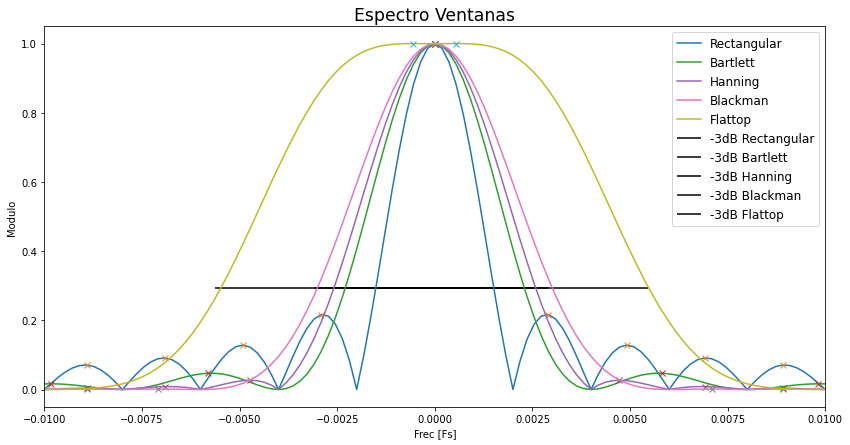

In [7]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''] # <-- acá debería haber numeritos :)
                 ]

AnchoLobulo = []

fig, ax3 = plt.subplots()
for index in Ventanas:

    ax2.plot(frec,np.log10(espectro[0:,index]), label=Ventanas[index])
    pico = np.argmax(espectro[0:,index])
    picos,_ = signal.find_peaks(espectro[0:,index],)
    valorpicos = np.sort(espectro[0:,index][picos])
    diff_dB = 20*np.log10(valorpicos[-3]/valorpicos[-1])
    AnchoLobulo.append(signal.peak_widths(espectro[0:,index],[pico],rel_height=np.sqrt(2)/2))
    ax3.plot(frec,espectro[0:,index], label=Ventanas[index])
    ax3.hlines(AnchoLobulo[index][1],frec[int(AnchoLobulo[index][2])], frec[int(AnchoLobulo[index][3])], label='-3dB %s' %Ventanas[index])
    plt.plot(frec[picos], espectro[0:,index][picos], "x")
    
    tus_resultados.append([AnchoLobulo[index][0],diff_dB])
    
plt.xlim(-0.01, 0.01)
ax3.set_title('Espectro Ventanas', fontsize = 'xx-large')
ax3.set_ylabel('Modulo')
ax3.set_xlabel('Frec [Fs]')
ax3.legend(loc='upper right', fontsize='large')

df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

(0.0, 1.0)

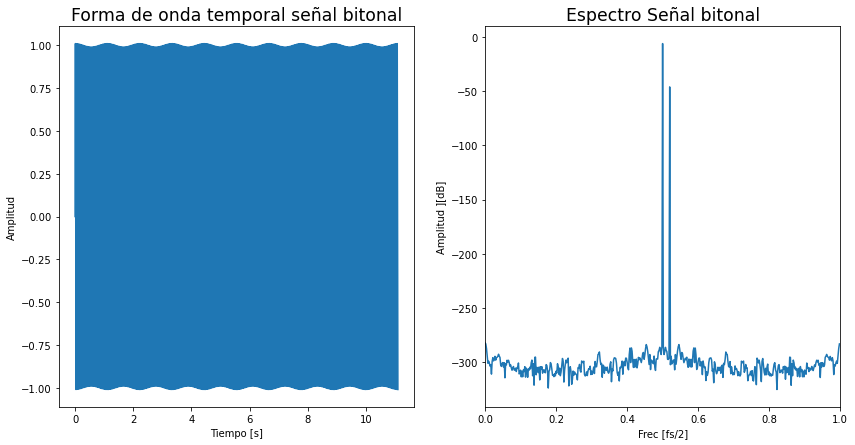

In [31]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

def mi_funcion_sen( vmax, dc, ff, ph, nn, fs):
    '''Genera una senial senoidal con los parametros indicados.

    Keyword arguments:
    vmax -- Valor pico de la senoidal
    dc -- componente de continua de la senial
    ff -- frecuencia de la senial
    ph -- fase de la senial
    nn -- numero de muestras de la senial
    fs - frecuencia de muestro de la senial
                                

    Returns: array of float, array of float

    '''  
    tt = np.arange(0.0, nn/fs, 1/fs)
    
    xx = dc + vmax*np.sin((2*np.pi*ff*tt+ph))
    
    return(tt, xx)

# Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################

a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

a2_dB = -40

a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

Offset = 0 #Volt
p0 = 0

tiempo, xx = mi_funcion_sen( a1, Offset, f1, p0, N, fs)
tiempo2, xx2 = mi_funcion_sen( a2, Offset, f2, p0, N, fs)
xx += xx2

espectro = np.abs(np.fft.fft(xx))/len(xx)
espectro = np.fft.fftshift(espectro, axes=0)
espectro = 20*np.log10(espectro)
frec = np.fft.fftfreq(len(xx),np.pi)
frec = np.fft.fftfreq(len(xx),0.5)
frec = np.fft.fftshift(frec)


plt.close('all')

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(tiempo, xx, label='')
ax2.plot(frec,espectro, label='')

ax1.set_title('Forma de onda temporal señal bitonal', fontsize = 'xx-large')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo [s]')

ax2.set_title('Espectro Señal bitonal', fontsize = 'xx-large')
ax2.set_ylabel('Amplitud ][dB]')
ax2.set_xlabel('Frec [fs/2]')
ax2.set_xlim(0,1)

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

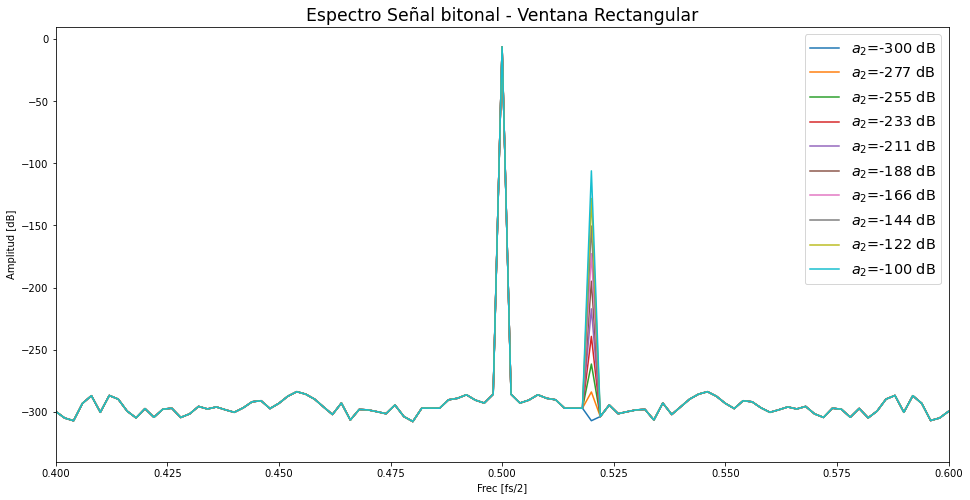

In [60]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################
fd = 0

#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 + fd*fs/N # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = np.linspace(-300,-100,10)
# a2_dB = np.array([-40])
a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(a2))
tf = np.ones(len(a2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz = a2*np.sin((2*np.pi*f2*tt+p1))
matriz += a1*np.sin((2*np.pi*f1*tt+p1))

#######################################
#Generacion de Ventanas
#######################################

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##############################################
#Graficas temporales
############################################
plt.close('all')

# fig, ax1 = plt.subplots()

# for index in np.arange(len(a2)):
    
 #    ax1.plot(tt[0:,index],matriz[0:,index])

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
    
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))/N
    espectro = np.fft.fftshift(espectro, axes=0)
    espectro = 20*np.log10(espectro)

    frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    

    fig, ax1 = plt.subplots()
        
    for nn,aa in zip(np.arange(len(a2)), a2_dB):
    # for nn in np.arange(len(a2)):

        ax1.plot(frec,espectro[0:,nn], label='$a_2$=%i dB' %aa)
        ax1.set_title('Espectro Señal bitonal - Ventana %s' %Ventanas[index], fontsize = 'xx-large')
        plt.xlim(0.4,0.6)    
        ax1.set_ylabel('Amplitud [dB]')
        ax1.set_xlabel('Frec [fs/2]')
        ax1.legend(loc='upper right', fontsize='x-large')  # Add a legend.
        
        
    


¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> <p>Podemos observar que mientras nos mantengamos por encima del nivel del "piso de ruido" que observamos del espectro (Que tiene origen en la precisión de las variables utilizadas) podemos continuar evidenciando el segundo tono.<br> Para el caso podemos observar que aún para -277dB continua evidenciadonse la presencia del tono, pero si no conocieramos de antemano que se encuentrá allí, podría tranquilamente asumirse que se trata de algún espurio. Por eso elegiremos como $a^0_2$ a -255dB donde se observa el tono claramente por encima del nivel de "piso de ruido" </p>
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> <p> El poder medir $x_2$ como se explicó en la respuesta anterior es posible gracias a que las frecuencias de nuestros tonos son multiplos de nuestra resolucion espectral, evitando asi el efecto de desparramo espectral.<br>
    Si modificasemos el valor de la variable fd a un valor tal como 0.25, se produciría el efecto de leakage, ya no siendo posible medir $x_2$ en la gráfica del espectro</p> 
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> <p>A continuación podemos obsevar el efecto de cuantizar la señal, donde el piso de ruido aumenta y ademas genera cierta simetría respecto al tono central. Esto hace que nuestro nuevo $a^0_2$ deba ser mayor para ser distinguido del ruido, rondando por encima de los -77dB</p>
</div>

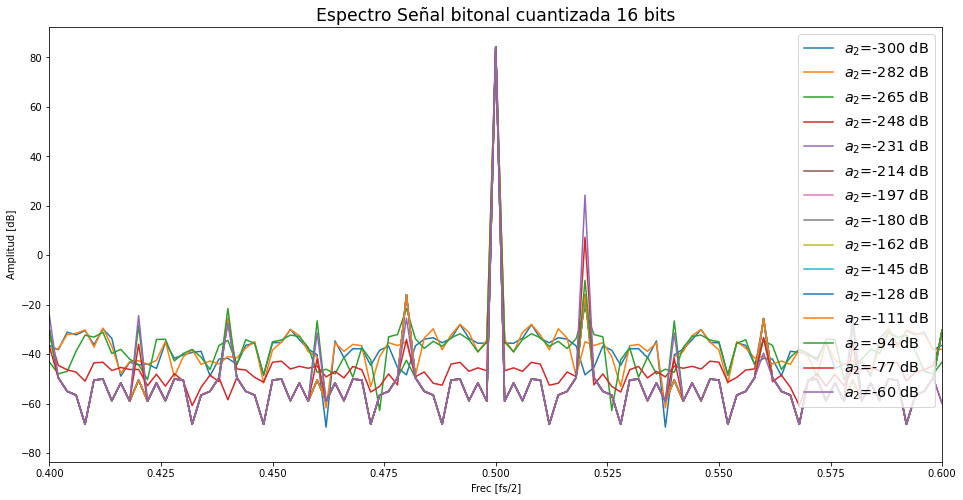

In [59]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################
fd = 0

#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 + fd*fs/N # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = np.linspace(-300,-60,15)
# a2_dB = np.array([-40])
a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(a2))
tf = np.ones(len(a2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz = a2*np.sin((2*np.pi*f2*tt+p1))
matriz += a1*np.sin((2*np.pi*f1*tt+p1))

#######################################
#Efecto ADC 16 bits
#######################################
bits = 16

##  Adecuacion de la señal para el ADC

continua = 0.5

matriz /= 2*np.max(matriz)
matriz += continua

matriz= np.rint(matriz*(2**bits-1))-(2**bits-1)/2 #Discretizo y elimino continua

#######################################
#Generacion de Ventanas
#######################################

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##############################################
#Graficas temporales
############################################
plt.close('all')

#fig, ax1 = plt.subplots()
#for index in np.arange(len(a2)):  
#     ax1.plot(tt[0:,index],matriz[0:,index])

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
    
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))/N
    espectro = np.fft.fftshift(espectro, axes=0)
    espectro = 20*np.log10(espectro)

    frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    

    fig, ax1 = plt.subplots()
        
    for nn,aa in zip(np.arange(len(a2)), a2_dB):
    # for nn in np.arange(len(a2)):

        ax1.plot(frec,espectro[0:,nn], label='$a_2$=%i dB' %aa)
        ax1.set_title('Espectro Señal bitonal cuantizada %i bits' %bits, fontsize = 'xx-large')
        plt.xlim(0.4,0.6)    
        ax1.set_ylabel('Amplitud [dB]')
        ax1.set_xlabel('Frec [fs/2]')
        ax1.legend(loc='upper right', fontsize='x-large')  # Add a legend.
        

    


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

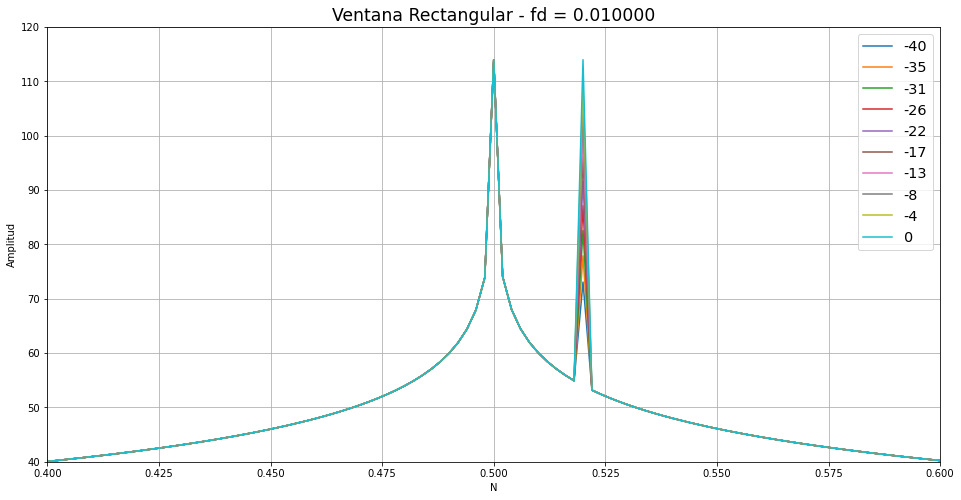

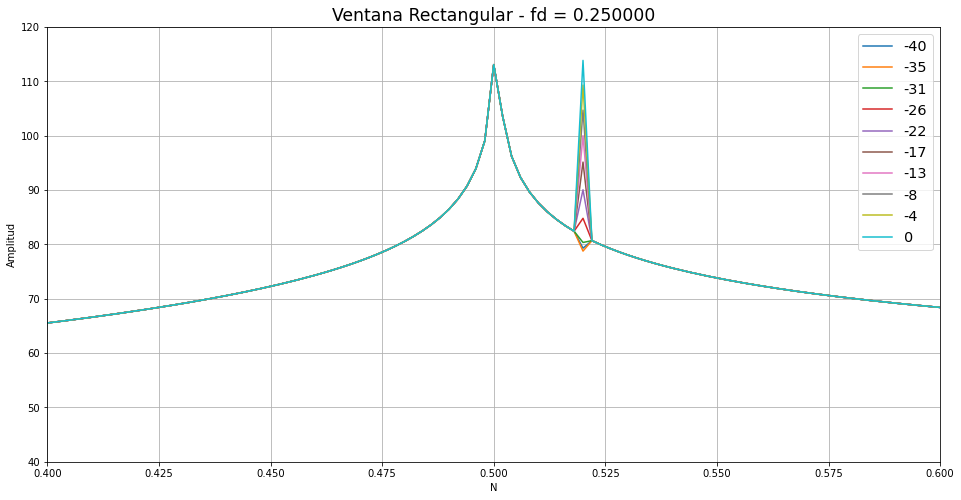

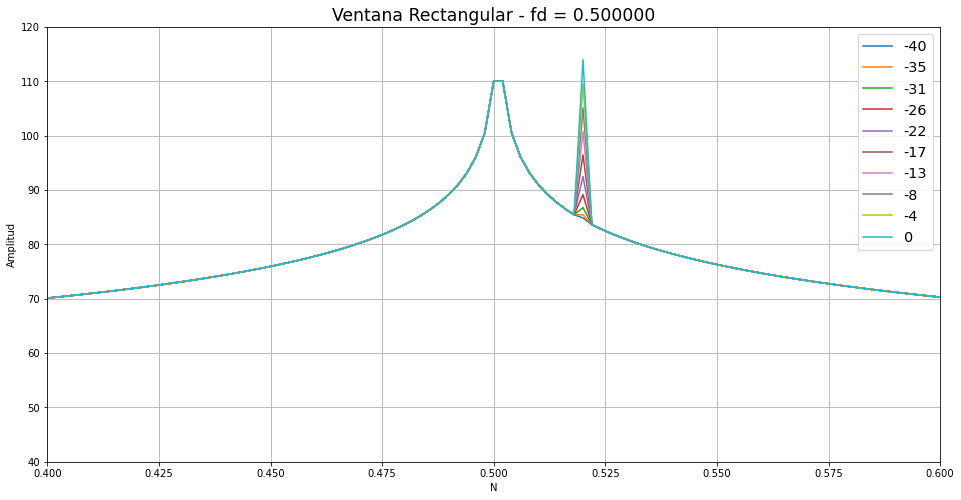

In [39]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################

#Desintonía
fd = [0.01, 0.25, 0.5]


#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = np.linspace(-40,0,10)
# a2_dB = np.array([-40])
a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(a2))
tf = np.ones(len(a2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz2 = a2*np.sin((2*np.pi*f2*tt+p1))

#######################################
#Generacion de Ventanas
#######################################

# Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##############################################
#Graficas temporales
############################################
plt.close('all')

# fig, ax1 = plt.subplots()

# for index in np.arange(len(a2)):
    
 #    ax1.plot(tt[0:,index],matriz[0:,index])

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
    for f0 in fd:

        matriz = matriz2 + a1*np.sin((2*np.pi*(f1+f0*fs/N)*tt+p1))

    
        espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))*N
        espectro = np.fft.fftshift(espectro, axes=0)
        espectro = 20*np.log10(espectro)
        
        frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
        frec = np.fft.fftshift(frec)    
        
        fig, ax1 = plt.subplots()
            
        ax1.plot(frec,espectro)
        ax1.set_title('Ventana %s - fd = %f' %(Ventanas[index], f0), fontsize = 'xx-large')
        plt.xlim(0.4,0.6)
        plt.ylim(40,120)    
        ax1.set_ylabel('Amplitud')
        ax1.set_xlabel('N')
        # a2_dB.astype('int32')
        ax1.legend(a2_dB.astype('int32'),loc='upper right', fontsize='x-large')  # Add a legend.
        plt.grid()


In [36]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '-40dB', # <-- acá debería haber numeritos :)
                   '-26dB', # <-- acá debería haber numeritos :)
                   '-31dB' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,-40dB
moderada,-26dB
máxima,-31dB


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

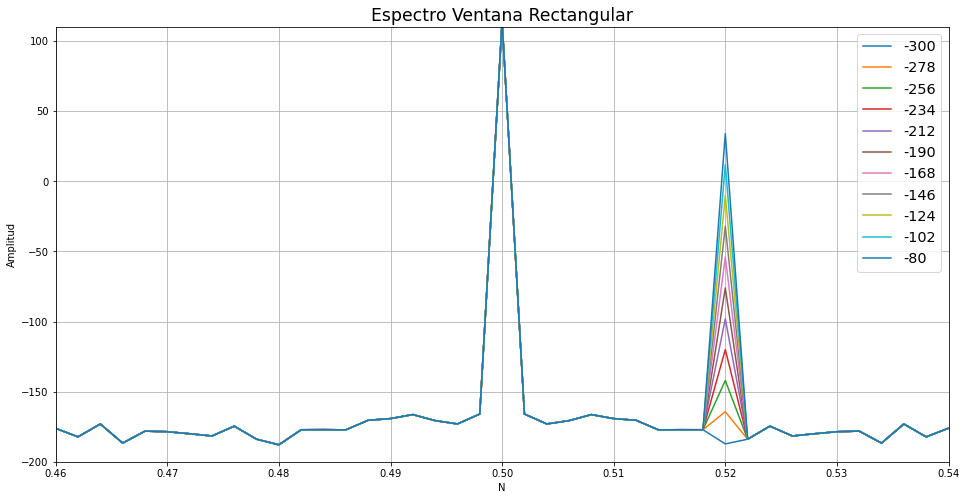

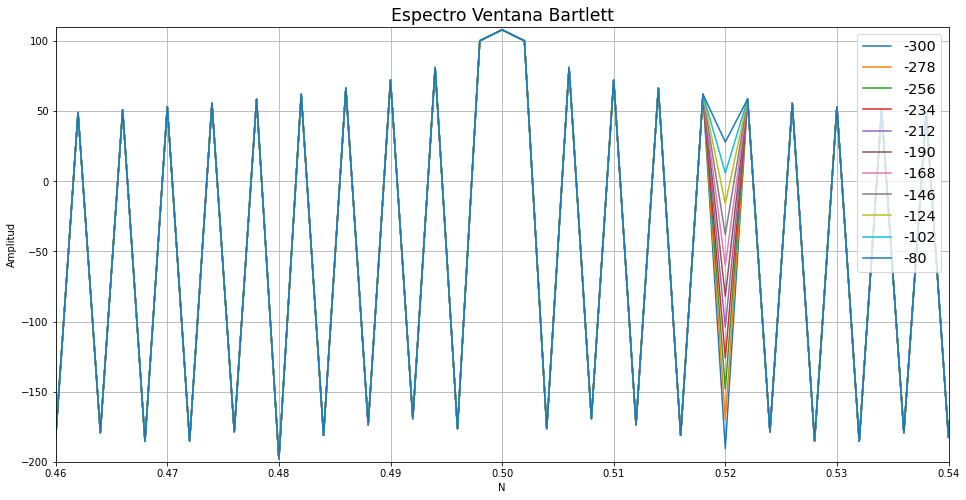

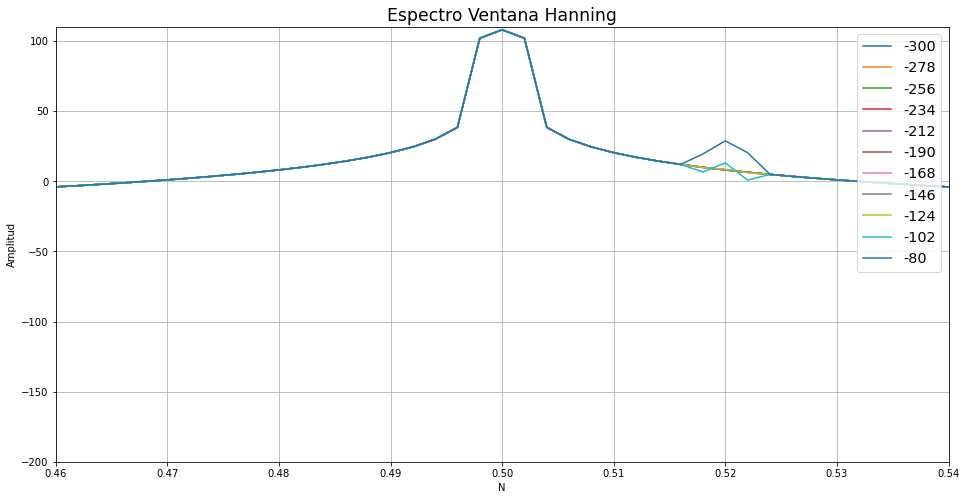

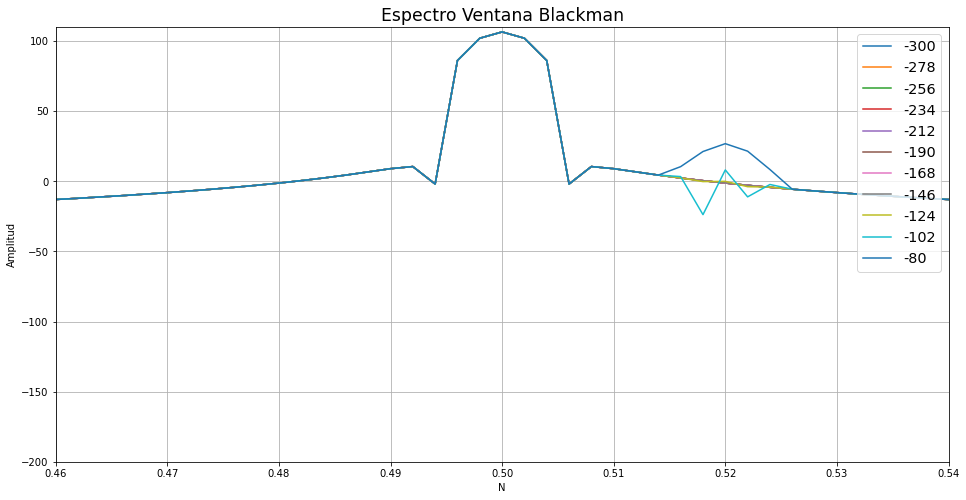

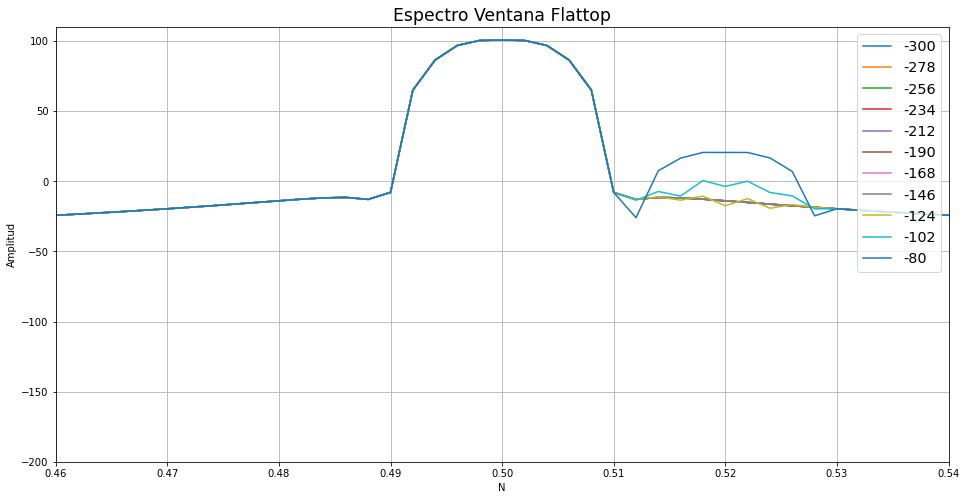

In [63]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################

#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = np.linspace(-300,-80,11)
# a2_dB = np.array([-40])
a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(a2))
tf = np.ones(len(a2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz = a2*np.sin((2*np.pi*f2*tt+p1))
matriz += a1*np.sin((2*np.pi*f1*tt+p1))

#######################################
#Generacion de Ventanas
#######################################

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
# Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
    
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))*N
    espectro = np.fft.fftshift(espectro, axes=0)
    espectro = 20*np.log10(espectro)

    frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    

    fig, ax1 = plt.subplots()
        
    ax1.plot(frec,espectro)
    ax1.set_title('Espectro Ventana %s' %Ventanas[index], fontsize = 'xx-large')
    plt.xlim(0.46,0.540)    
    plt.ylim(-200,110)    
    ax1.set_ylabel('Amplitud')
    ax1.set_xlabel('N')
    # a2_dB.astype('int32')
    ax1.legend((a2_dB.astype('int32')),loc='upper right', fontsize='x-large')  # Add a legend.

    # ax1.legend(a2_dB.astype('int32'),loc='upper right', fontsize='x-large')  # Add a legend.
    plt.grid()


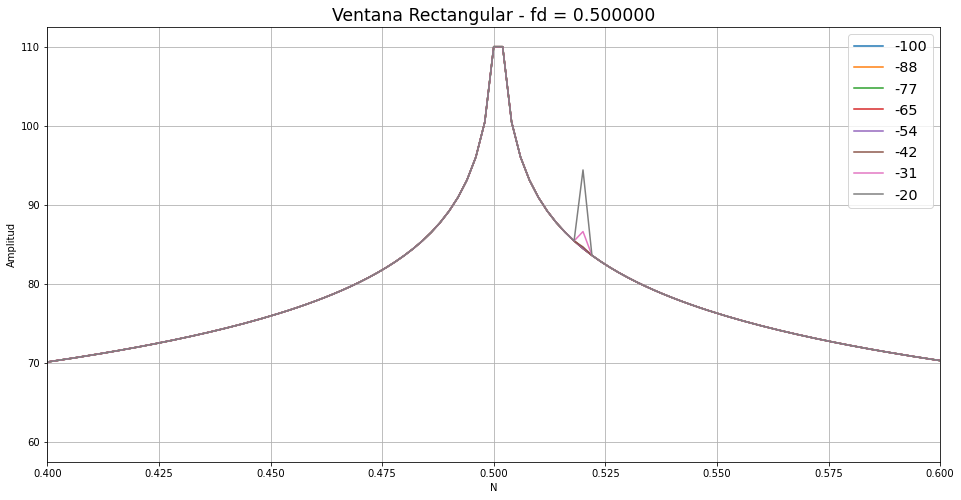

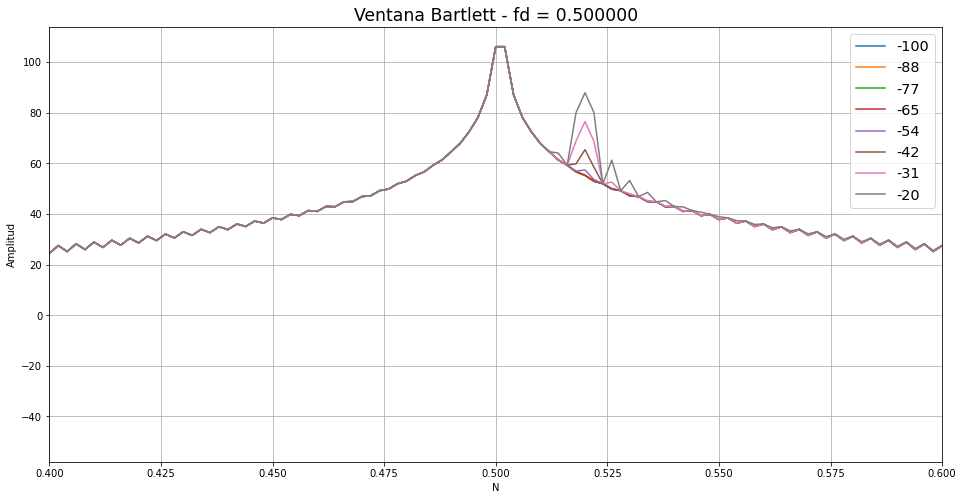

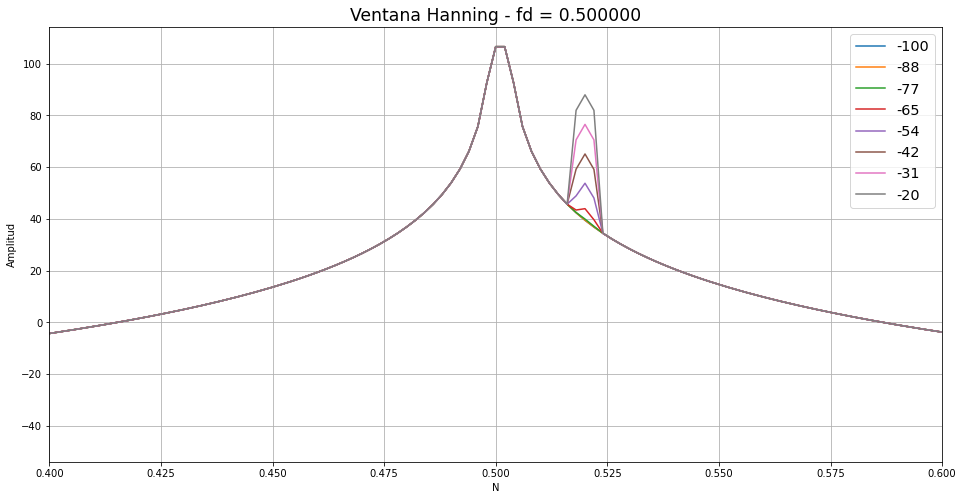

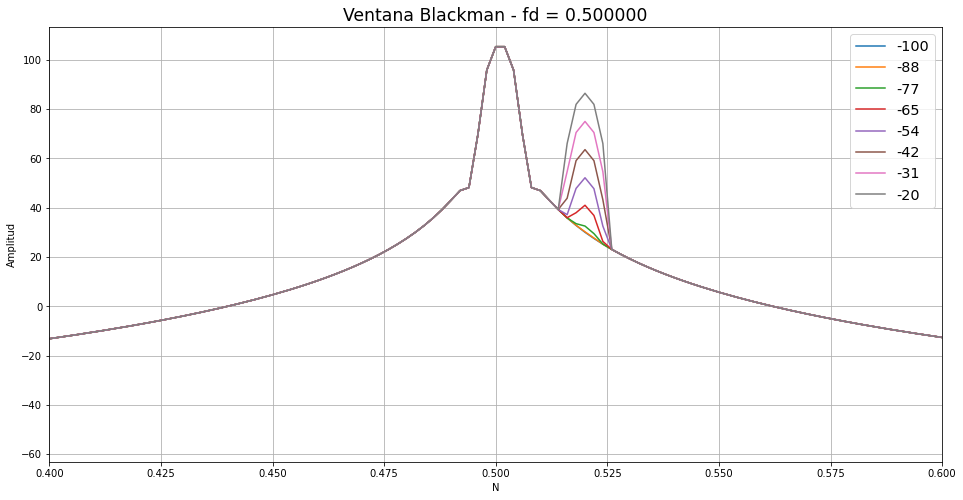

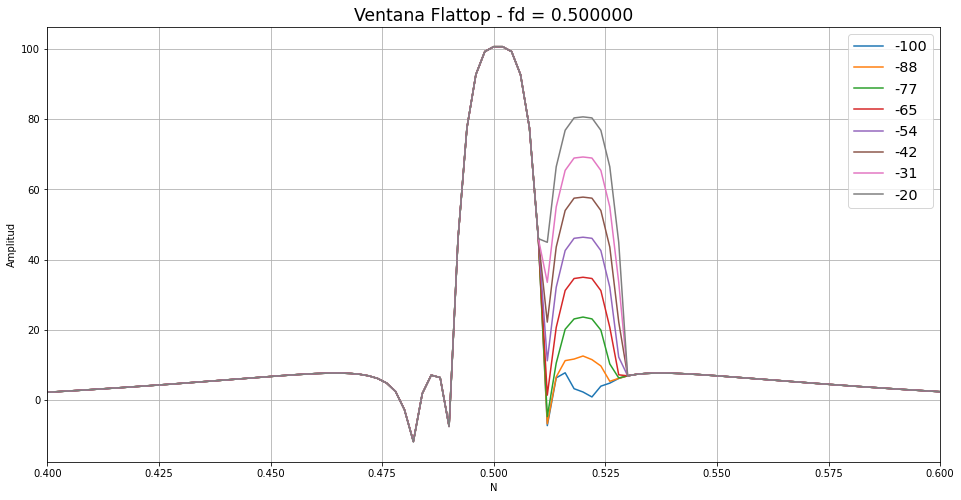

In [61]:
N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################

#Desintonía
fd = [0.5]


#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = np.linspace(-100,-20,8)
# a2_dB = np.array([-40])
a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(a2))
tf = np.ones(len(a2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz2 = a2*np.sin((2*np.pi*f2*tt+p1))

#######################################
#Generacion de Ventanas
#######################################

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
#Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##############################################
#Graficas temporales
############################################
plt.close('all')

# fig, ax1 = plt.subplots()

# for index in np.arange(len(a2)):
    
 #    ax1.plot(tt[0:,index],matriz[0:,index])

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
    for f0 in fd:
        matriz = matriz2 + a1*np.sin((2*np.pi*(f1+f0*fs/N)*tt+p1))
    
        espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))*N
        espectro = np.fft.fftshift(espectro, axes=0)
        espectro = 20*np.log10(espectro)
        
        frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
        frec = np.fft.fftshift(frec)    
        
        fig, ax1 = plt.subplots()
            
        ax1.plot(frec,espectro)
        ax1.set_title('Ventana %s - fd = %f' %(Ventanas[index], f0), fontsize = 'xx-large')
        plt.xlim(0.4,0.6)    
        ax1.set_ylabel('Amplitud')
        ax1.set_xlabel('N')
        ax1.legend(a2_dB.astype('int32'),loc='upper right', fontsize='x-large')  # Add a legend.
        plt.grid()


In [48]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['-255dB', '-31dB'], # <-- acá debería haber numeritos :)
                   ['-255dB', '-42dB'], # <-- acá debería haber numeritos :)
                   ['-100dB', '-54dB'], # <-- acá debería haber numeritos :)
                   ['-100dB', '-65dB'], # <-- acá debería haber numeritos :)
                   ['-100dB', '-88dB'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-255dB,-31dB
Bartlett,-255dB,-42dB
Hann,-100dB,-54dB
Blackman,-100dB,-65dB
Flat-top,-100dB,-88dB


<div class="alert alert-block alert-warning">
<b>Conclusión:</b> <p>Con el anterior experimento pudo comprobarse que las ventanas ayudaron en la visualizacion del tono para los casos donde se presentaba desparramo espectral. Por el contrario cuando nuestra señal se encontraba en perfecto sintonia respecto de fs, la ventana entorpeció la visualizacion del segundo tono.</p>
    <p> Recordemos que para un caso real, lo mas probable es que nuestra señal no se encuentre en sintonía con nuestra frecuencia de muestreo</p>
</div>

<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

,$\Omega_0$ (#)
Rectangular,2
Bartlett,
Hann,3
Blackman,3
Flat-top,5


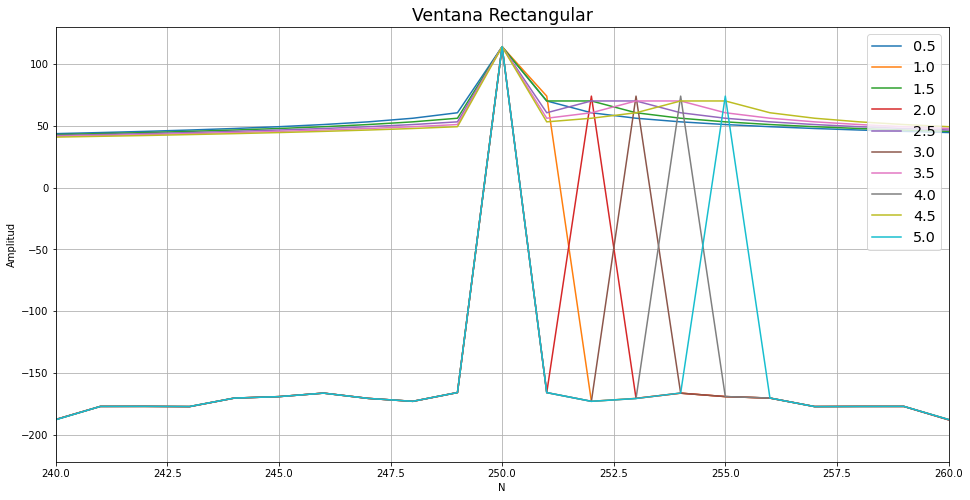

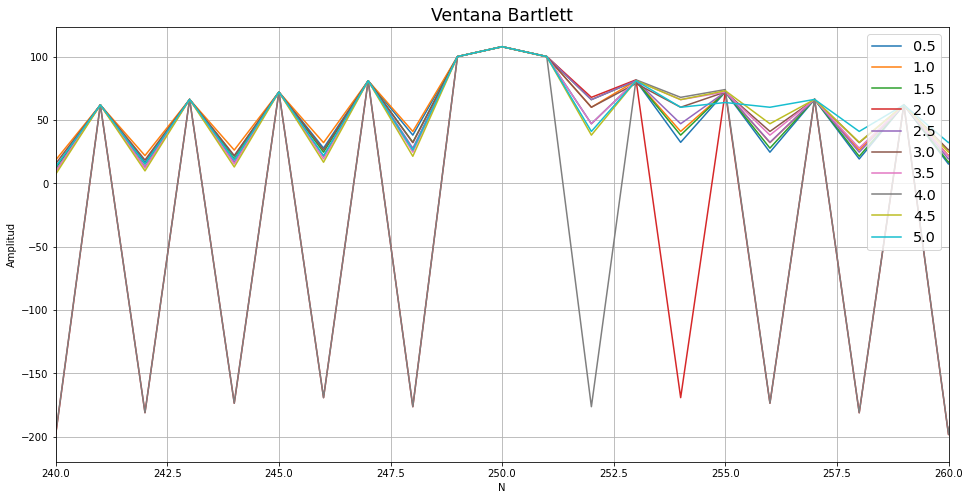

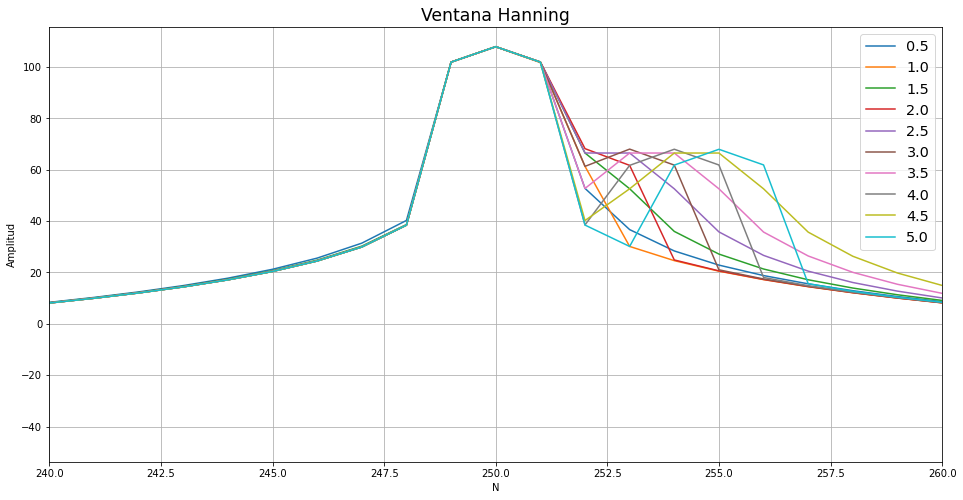

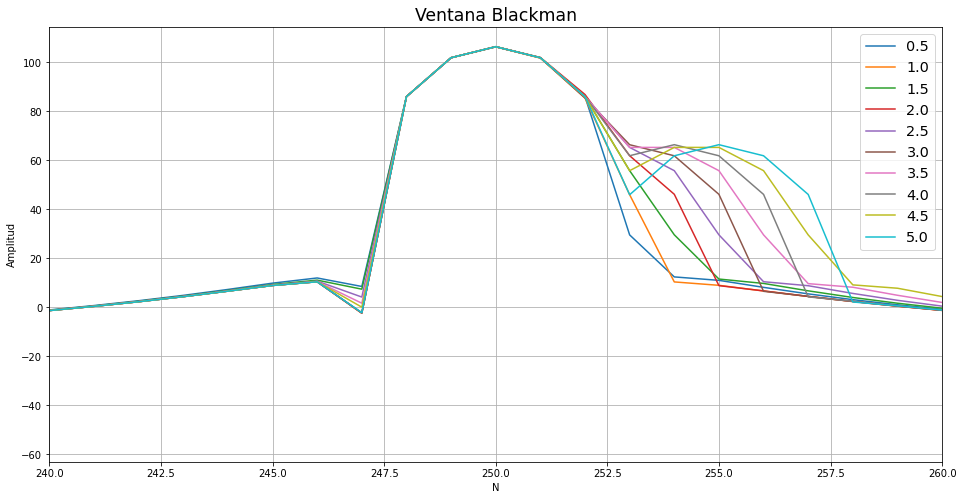

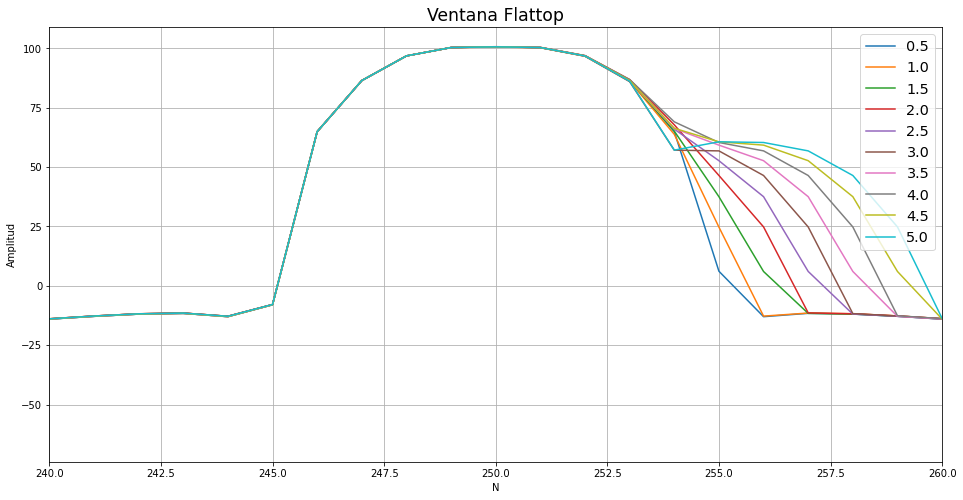

In [64]:

#######################################
# Tu simulación que genere resultados #
#######################################


#Resolucion espectral
############################

N  = 1000 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################



#Tono 1
a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

Offset = 0 #Volt
p0 = 0


#Tono 2
a2_dB = -40
a2 = 10**(a2_dB/20)

fd = np.linspace(0.5,5,10)
f2 = f1+fd*(fs/N)
######################################
#Generacion de matriz tiempo
######################################
t0 = np.zeros(len(f2))
tf = np.ones(len(f2))*(N-1)/fs

tt = np.linspace(t0, tf, N)
# tt = np.arange(0.0, N/fs, 1/fs)

######################################
#GEneracion de tonos
######################################

matriz = a2*np.sin((2*np.pi*f2*tt+p1))
matriz += a1*np.sin((2*np.pi*f1*tt+p1))


#######################################
#Generacion de Ventanas
#######################################

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }
# Ventanas = { 0:'Rectangular'}

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##############################################
#Graficas temporales
############################################
plt.close('all')

# fig, ax1 = plt.subplots()

# for index in np.arange(len(a2)):
    
 #    ax1.plot(tt[0:,index],matriz[0:,index])
 
 #############################################
 #Zero Padding
 #############################################
 
# matriz = np.concatenate((matriz,np.zeros([100,np.shape(matriz)[1]])),axis=0) 
# ventana = np.concatenate((ventana,np.zeros([100,np.shape(ventana)[1]])),axis=0) 

############################################
#Calculo de DFT
###########################################
for index in Ventanas:
       
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(len(matriz),1), axis=0))*N
    espectro = np.fft.fftshift(espectro, axes=0)
    espectro = 20*np.log10(espectro)
    
    frec = np.fft.fftfreq(espectro.shape[0],1/N) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    
    
    fig, ax1 = plt.subplots()
        
    ax1.plot(frec,espectro)
    ax1.set_title('Ventana %s' %Ventanas[index], fontsize = 'xx-large')
    # plt.xlim(0.48,0.52)    
    plt.xlim(240,260)    
    ax1.set_ylabel('Amplitud')
    ax1.set_xlabel('N')
    # a2_dB.astype('int32')
    ax1.legend(fd,loc='upper right', fontsize='x-large')  # Add a legend.
    # ax1.xaxis.set_minor_locator(MultipleLocator(1/N))
    plt.grid('minor')


tus_resultados = [ 
                   '2', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '3', # <-- acá debería haber numeritos :)
                   '3', # <-- acá debería haber numeritos :)
                   '5' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

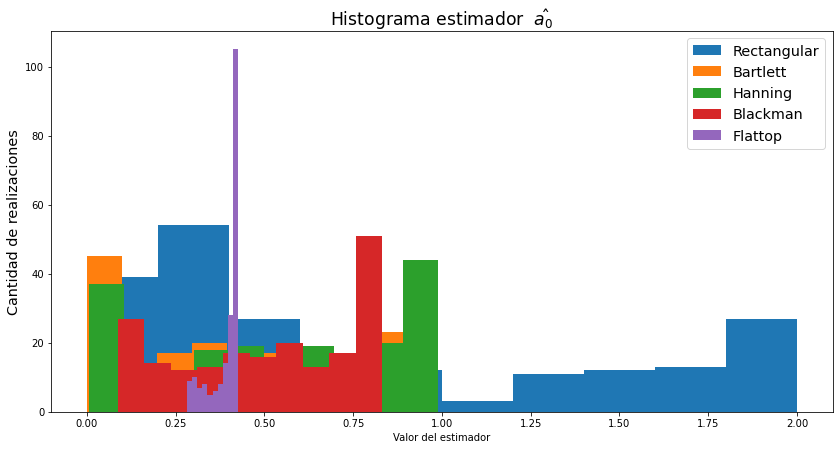

In [25]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Resolucion espectral - Realizaciones
############################

N  = 100 # muestras
fs = 90 # Hz

realizaciones = 200

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##################
# a.4) Senoidal #
#################

a1 = 2     # Volts
p1 = 0     # radianes
f0 = fs/4 # Hz

Offset = 0

desintonia = np.random.uniform(-2,2,realizaciones)
f1 = f0+desintonia*fs/N

##############################################
#Generacion de vector temporal
##############################################

t0 = np.zeros(realizaciones)
tf = np.ones(realizaciones)*(N-1)/fs

tt = np.linspace(t0, tf, N)

#############################################
#Generación de matriz de realizaciones#
#############################################

matriz = a1*np.sin((2*np.pi*f1*tt+p1))

##############################################
#Calculo de DFT aplicando la i-esima ventana
##############################################

sesgo = []
varianza = []

for index in Ventanas:
    
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))*a1/N
    espectro = np.fft.fftshift(espectro, axes=0)
    frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    

    sesgo.append(np.mean(espectro[25,0:])-a1)
    varianza.append(np.var(espectro[25,0:]))

    plt.figure(1)
    plt.hist(espectro[25,0:], 10, label = Ventanas[index])
    plt.title('Histograma estimador  $ \hat{a_0} $', fontsize = 'xx-large')
    plt.ylabel('Cantidad de realizaciones', fontsize='x-large')
    plt.xlabel('Valor del estimador')
    plt.legend(loc='upper right', fontsize='x-large')


In [26]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                 ]

tus_resultados = np.column_stack((sesgo,varianza))

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.225727,0.455969
Bartlett,-1.513993,0.126325
Hann,-1.461188,0.115013
Blackman,-1.488039,0.062500
Flat-top,-1.605516,0.001855


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

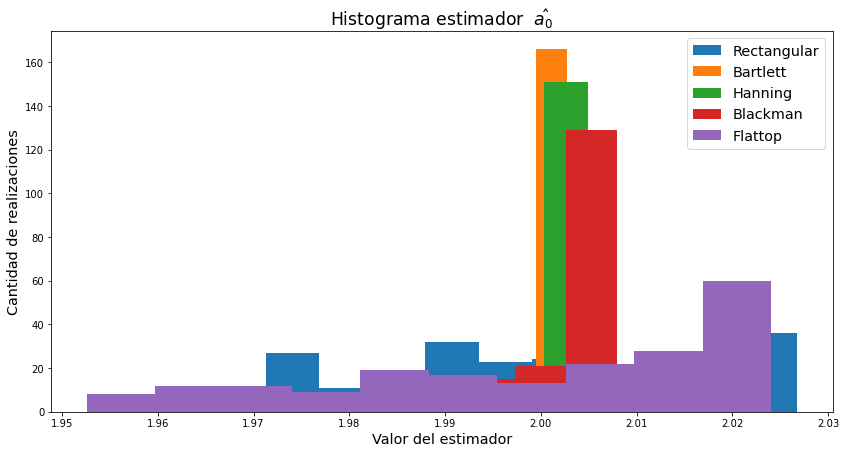

In [3]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Resolucion espectral - Realizaciones
############################

N  = 100 # muestras
fs = 90 # Hz

realizaciones = 200

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N).reshape((N,1))
VentBarlett = signal.windows.bartlett(N).reshape((N,1))
VentHann = signal.windows.hann(N).reshape((N,1))
VentBlack = signal.windows.blackman(N).reshape((N,1))
VentFlat = signal.windows.flattop(N).reshape((N,1))

ventana = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))

##################
# a.4) Senoidal #
#################

a1 = 2     # Volts
p1 = 0     # radianes
f0 = fs/4 # Hz

Offset = 0

desintonia = np.random.uniform(-2,2,realizaciones)
f1 = f0+desintonia*fs/N

bins_int = 2
##############################################
#Generacion de vector temporal
##############################################

t0 = np.zeros(realizaciones)
tf = np.ones(realizaciones)*(N-1)/fs

tt = np.linspace(t0, tf, N)

#############################################
#Generación de matriz de realizaciones#
#############################################

matriz = a1*np.sin((2*np.pi*f1*tt+p1))

##############################################
#Calculo de DFT aplicando la i-esima ventana
##############################################

sesgo = []
varianza = []

plt.figure(1)
for index in Ventanas:
    
    espectro = np.abs(np.fft.fft(matriz*ventana[0:,index].reshape(N,1), axis=0))*a1/N
    espectro = np.fft.fftshift(espectro, axes=0)
    frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Fs
    frec = np.fft.fftshift(frec)    
    
    #Estimador - CASO 2
    a0 = espectro[25-bins_int:25+bins_int+1,0:]
    a0 = (np.sqrt(np.sum(a0**2,axis=0)/5))
          
    sesgo.append(np.mean(a0)-a1)
    a_0_u = a0 - sesgo[index] 
    varianza.append(np.var(a0))

    plt.figure(1)
    #plt.hist(a0, 10, label = Ventanas[index])
    plt.hist(a_0_u, 10, label = Ventanas[index])  #Histograma con sesgo nulo

    plt.title('Histograma estimador  $ \hat{a_0} $', fontsize = 'xx-large')
    plt.ylabel('Cantidad de realizaciones', fontsize='x-large')
    plt.xlabel('Valor del estimador', fontsize='x-large')
    plt.legend(loc='upper right', fontsize='x-large')
  



In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                 ]

tus_resultados = np.column_stack((sesgo,varianza))

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.129054,0.000287
Bartlett,-1.489602,0.000050
Hann,-1.460199,0.000124
Blackman,-1.516811,0.000190
Flat-top,-1.654760,0.000453
